In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
from scipy import spatial
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

import keras
from keras.layers import Conv1D, MaxPool2D, Flatten, LSTM, MaxPooling1D, Embedding
from keras.layers import Dropout, Dense, TimeDistributed, Activation, Bidirectional
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tqdm import tqdm
import python_speech_features as psf

plt.rcParams['figure.figsize'] = 16,5

Using TensorFlow backend.


In [2]:
newdf= pd.read_csv('TORONTO/Processed_MFCCS_Young.csv')
df_divided= np.random.rand(len(newdf)) < 0.8
train= newdf[df_divided]
test= newdf[~df_divided]
trainfeatures = train.iloc[:, 1:-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, 1:-1]
testlabel = test.iloc[:, -1:]


X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)
# Label Encoder
lb = LabelEncoder()

y_train= to_categorical(lb.fit_transform(y_train))
y_test= to_categorical(lb.fit_transform(y_test))

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
input_shape=(x_testcnn.shape[1], x_testcnn.shape[2])

In [4]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.adam(lr=0.00001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 130, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 130, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 130, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 130, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 130, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 16, 256)          

In [5]:
cnnhistory= model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Train on 1143 samples, validate on 257 samples
Epoch 1/700
1143/1143 [==============================] - 6s 5ms/step - loss: 1.9854 - accuracy: 0.1522 - val_loss: 1.9154 - val_accuracy: 0.2218
Epoch 2/700
1143/1143 [==============================] - 5s 5ms/step - loss: 1.9164 - accuracy: 0.1767 - val_loss: 1.8804 - val_accuracy: 0.2607
Epoch 3/700
1143/1143 [==============================] - 6s 5ms/step - loss: 1.8786 - accuracy: 0.2581 - val_loss: 1.8376 - val_accuracy: 0.2179
Epoch 4/700
1143/1143 [==============================] - 5s 5ms/step - loss: 1.8316 - accuracy: 0.2905 - val_loss: 1.7600 - val_accuracy: 0.3891
Epoch 5/700
1143/1143 [==============================] - 5s 5ms/step - loss: 1.7533 - accuracy: 0.3368 - val_loss: 1.6669 - val_accuracy: 0.4241
Epoch 6/700
1143/1143 [==============================] - 5s 5ms/step - loss: 1.6625 - accuracy: 0.3850 - val_loss: 1.5671 - val_accuracy: 0.4942
Epoch 7/700
1143/1143 [==============================] - 5s 5ms/step - loss: 1.5570

Epoch 57/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.4014 - accuracy: 0.8618 - val_loss: 0.4270 - val_accuracy: 0.8794
Epoch 58/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.3909 - accuracy: 0.8670 - val_loss: 0.3555 - val_accuracy: 0.9300
Epoch 59/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.4130 - accuracy: 0.8670 - val_loss: 0.3688 - val_accuracy: 0.9066
Epoch 60/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.3730 - accuracy: 0.8749 - val_loss: 0.3397 - val_accuracy: 0.9105
Epoch 61/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.3589 - accuracy: 0.8714 - val_loss: 0.3637 - val_accuracy: 0.8988
Epoch 62/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.3728 - accuracy: 0.8723 - val_loss: 0.3514 - val_accuracy: 0.9144
Epoch 63/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.3715 - accuracy: 0.8626 - val_loss: 0.3316 -

1143/1143 [==============================] - 5s 5ms/step - loss: 0.1664 - accuracy: 0.9449 - val_loss: 0.2257 - val_accuracy: 0.9455
Epoch 114/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.1637 - accuracy: 0.9423 - val_loss: 0.2036 - val_accuracy: 0.9300
Epoch 115/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.1619 - accuracy: 0.9545 - val_loss: 0.2183 - val_accuracy: 0.9494
Epoch 116/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.1773 - accuracy: 0.9326 - val_loss: 0.2329 - val_accuracy: 0.9455
Epoch 117/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.1702 - accuracy: 0.9440 - val_loss: 0.2259 - val_accuracy: 0.9416
Epoch 118/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.1709 - accuracy: 0.9466 - val_loss: 0.2341 - val_accuracy: 0.9377
Epoch 119/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.1493 - accuracy: 0.9431 - val_loss: 0.2068 - val_ac

Epoch 169/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0757 - accuracy: 0.9738 - val_loss: 0.1935 - val_accuracy: 0.9416
Epoch 170/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0696 - accuracy: 0.9773 - val_loss: 0.1995 - val_accuracy: 0.9377
Epoch 171/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0758 - accuracy: 0.9746 - val_loss: 0.1498 - val_accuracy: 0.9455
Epoch 172/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0777 - accuracy: 0.9711 - val_loss: 0.1760 - val_accuracy: 0.9300
Epoch 173/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0867 - accuracy: 0.9703 - val_loss: 0.1682 - val_accuracy: 0.9494
Epoch 174/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0725 - accuracy: 0.9764 - val_loss: 0.1966 - val_accuracy: 0.9455
Epoch 175/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0

Epoch 225/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0317 - accuracy: 0.9913 - val_loss: 0.2125 - val_accuracy: 0.9416
Epoch 226/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0353 - accuracy: 0.9921 - val_loss: 0.1525 - val_accuracy: 0.9377
Epoch 227/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0428 - accuracy: 0.9843 - val_loss: 0.1598 - val_accuracy: 0.9377
Epoch 228/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.1567 - val_accuracy: 0.9416
Epoch 229/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0314 - accuracy: 0.9948 - val_loss: 0.1611 - val_accuracy: 0.9494
Epoch 230/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0285 - accuracy: 0.9948 - val_loss: 0.1818 - val_accuracy: 0.9339
Epoch 231/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0344 - accuracy: 0.9930 - val_loss: 0

Epoch 281/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0209 - accuracy: 0.9965 - val_loss: 0.2185 - val_accuracy: 0.9416
Epoch 282/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0196 - accuracy: 0.9956 - val_loss: 0.1735 - val_accuracy: 0.9494
Epoch 283/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0127 - accuracy: 0.9991 - val_loss: 0.1712 - val_accuracy: 0.9533
Epoch 284/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0218 - accuracy: 0.9921 - val_loss: 0.1878 - val_accuracy: 0.9455
Epoch 285/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0144 - accuracy: 0.9965 - val_loss: 0.1430 - val_accuracy: 0.9650
Epoch 286/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.1615 - val_accuracy: 0.9533
Epoch 287/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0218 - accuracy: 0.9956 - val_loss: 0

Epoch 337/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0179 - accuracy: 0.9956 - val_loss: 0.1891 - val_accuracy: 0.9494
Epoch 338/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.1551 - val_accuracy: 0.9494
Epoch 339/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.1590 - val_accuracy: 0.9533
Epoch 340/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.1568 - val_accuracy: 0.9494
Epoch 341/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0075 - accuracy: 0.9991 - val_loss: 0.1595 - val_accuracy: 0.9455
Epoch 342/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.1720 - val_accuracy: 0.9455
Epoch 343/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0126 - accuracy: 0.9974 - val_loss: 0

Epoch 393/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 0.1591 - val_accuracy: 0.9455
Epoch 394/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.2117 - val_accuracy: 0.9416
Epoch 395/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0139 - accuracy: 0.9974 - val_loss: 0.1599 - val_accuracy: 0.9611
Epoch 396/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0082 - accuracy: 0.9991 - val_loss: 0.1755 - val_accuracy: 0.9455
Epoch 397/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1915 - val_accuracy: 0.9494
Epoch 398/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0330 - accuracy: 0.9904 - val_loss: 0.1990 - val_accuracy: 0.9416
Epoch 399/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0087 - accuracy: 0.9991 - val_loss: 0

Epoch 449/700
1143/1143 [==============================] - 5s 5ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2042 - val_accuracy: 0.9494
Epoch 450/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1858 - val_accuracy: 0.9533
Epoch 451/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.1771 - val_accuracy: 0.9533
Epoch 452/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1919 - val_accuracy: 0.9455
Epoch 453/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.2184 - val_accuracy: 0.9339
Epoch 454/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0071 - accuracy: 0.9965 - val_loss: 0.1323 - val_accuracy: 0.9650
Epoch 455/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0

Epoch 505/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1731 - val_accuracy: 0.9533
Epoch 506/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.2079 - val_accuracy: 0.9533
Epoch 507/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1660 - val_accuracy: 0.9533
Epoch 508/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1646 - val_accuracy: 0.9494
Epoch 509/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1559 - val_accuracy: 0.9494
Epoch 510/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1864 - val_accuracy: 0.9416
Epoch 511/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0072 - accuracy: 0.9965 - val_loss: 0

Epoch 561/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2187 - val_accuracy: 0.9377
Epoch 562/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 0.1623 - val_accuracy: 0.9572
Epoch 563/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1521 - val_accuracy: 0.9572
Epoch 564/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1738 - val_accuracy: 0.9572
Epoch 565/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1506 - val_accuracy: 0.9572
Epoch 566/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9572
Epoch 567/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0

1143/1143 [==============================] - 5s 4ms/step - loss: 0.0158 - accuracy: 0.9904 - val_loss: 0.3156 - val_accuracy: 0.9377
Epoch 617/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0072 - accuracy: 0.9974 - val_loss: 0.1605 - val_accuracy: 0.9650
Epoch 618/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0070 - accuracy: 0.9974 - val_loss: 0.2000 - val_accuracy: 0.9611
Epoch 619/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0087 - accuracy: 0.9965 - val_loss: 0.1733 - val_accuracy: 0.9533
Epoch 620/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.1728 - val_accuracy: 0.9533
Epoch 621/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1906 - val_accuracy: 0.9494
Epoch 622/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.2160 - val_ac

1143/1143 [==============================] - 5s 4ms/step - loss: 9.9046e-04 - accuracy: 1.0000 - val_loss: 0.1991 - val_accuracy: 0.9533
Epoch 672/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1654 - val_accuracy: 0.9572
Epoch 673/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.1610 - val_accuracy: 0.9611
Epoch 674/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1697 - val_accuracy: 0.9533
Epoch 675/700
1143/1143 [==============================] - 5s 4ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.1694 - val_accuracy: 0.9494
Epoch 676/700
1143/1143 [==============================] - 5s 4ms/step - loss: 6.7205e-04 - accuracy: 1.0000 - val_loss: 0.1692 - val_accuracy: 0.9494
Epoch 677/700
1143/1143 [==============================] - 5s 4ms/step - loss: 5.7266e-04 - accuracy: 1.0000 - val_loss: 0.1

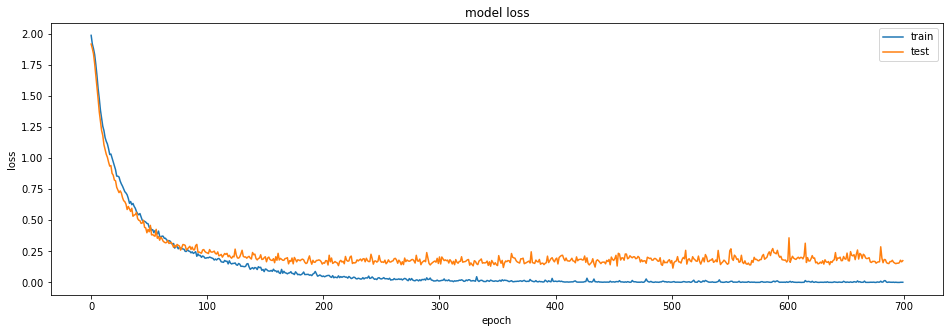

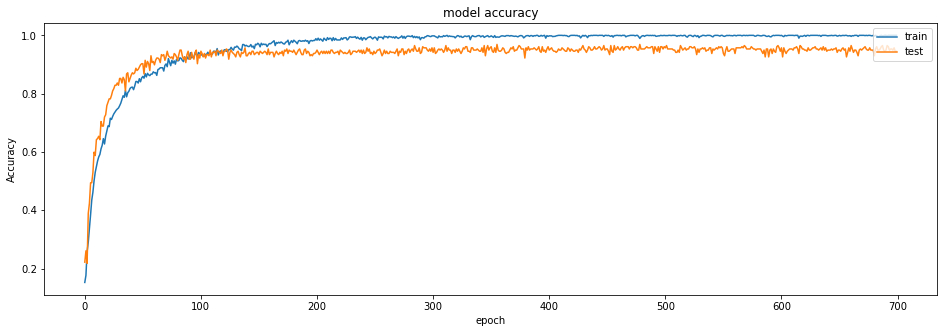

In [6]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [8]:
model_name = 'TESS_YEF.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\KIIT\Pypy\Speech Processing\Emotion Detection\saved_models\TESS_YEF.h5 


In [9]:
import json
model_json = model.to_json()
with open("saved_models/TESS_YEF.json", "w") as json_file:
    json_file.write(model_json)

In [7]:
score= model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 94.55%


In [10]:
preds= model.predict(x_testcnn, batch_size=32, verbose=1)
preds= preds.argmax(axis=1)
flat_preds= preds.astype(int).flatten()
predictions = (lb.inverse_transform((flat_preds)))
preddf = pd.DataFrame({'predictedvalues': predictions})
# preddf[:10]

257/257 [==============================] - 0s 2ms/step


In [11]:
actual= y_test.argmax(axis=1)
actual_flat= actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((actual_flat)))
actualdf = pd.DataFrame({'actualvalues': actualvalues})
# actualdf[:10]

In [12]:
value_match= actualdf.join(preddf)
value_match.head(10)

,actualvalues,predictedvalues
0,sad,angry
1,sad,sad
2,happy,happy
3,happy,happy
4,surprised,surprised
5,neutral,neutral
6,surprised,surprised
7,fear,fear
8,happy,angry
9,angry,angry


In [ ]:
value_match.to_csv('Predictions/Predictions_CNN_MLP_Female_EMODB.csv', index=False)